In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [3]:
x_train=pd.read_table('../../DDC_Data/har/HAR/train/X_train.txt',delim_whitespace=True,header=None)
y_train=pd.read_table('../../DDC_Data/har/HAR/train/y_train.txt',delim_whitespace=True,header=None)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [5]:
x_test=pd.read_table('../../DDC_Data/har/HAR/test/X_test.txt',delim_whitespace=True,header=None)
y_test=pd.read_table('../../DDC_Data/har/HAR/test/y_test.txt',delim_whitespace=True,header=None)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [6]:
classifier=svm.SVC()

In [7]:
parameters=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 
             'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [8]:
model=GridSearchCV(classifier,parameters,n_jobs=-1,cv=4,verbose=4)
model.fit(x_train.as_matrix(),y_train.as_matrix().ravel().T)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed:   44.6s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   45.7s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [24]:
from sklearn.metrics import accuracy_score
ypred=model.predict(x_test)
accuracy=accuracy_score(y_test,ypred)

In [25]:
print ('Best Parameters: '+ str(model.best_params_))
print ('Accuracy Score: '+ str(accuracy*100) + ' %')

Best Parameters: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy Score: 96.57278588394978 %


In [26]:
%run eval_score.ipynb 

In [27]:
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

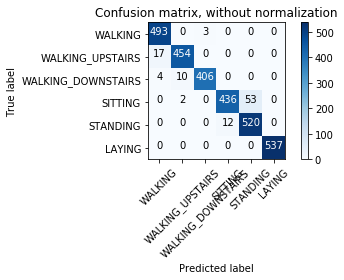

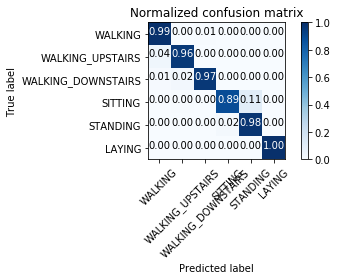

                    precision    recall  f1-score   support

           WALKING       0.96      0.99      0.98       496
  WALKING_UPSTAIRS       0.97      0.96      0.97       471
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
           SITTING       0.97      0.89      0.93       491
          STANDING       0.91      0.98      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.97      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [31]:
show_conf_matrix(y_test, ypred, LABELS)
show_clf_report(y_test, ypred, LABELS)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
x_train=x_train.values 
x_test=x_test.values
y_train=y_train.values
y_test=y_test.values

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [37]:
knn = KNeighborsClassifier(n_neighbors = 24)

In [39]:
knn.fit(x_train,y_train)
ypred = knn.predict(x_test)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [42]:
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(x_train, y_train)
    ypred = knn.predict(x_test)
    scores.append(accuracy_score(y_test,ypred))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


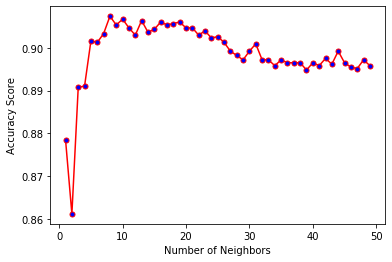

In [43]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [44]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [45]:
plt.show()

In [46]:
scores = np.array(scores)

In [47]:
print('Optimal No. Of Neighbors: ', scores.argmax()+1)
print('Accuracy Score: '+ str(scores.max()*100)+ ' %')

Optimal No. Of Neighbors:  8
Accuracy Score: 90.73634204275535 %


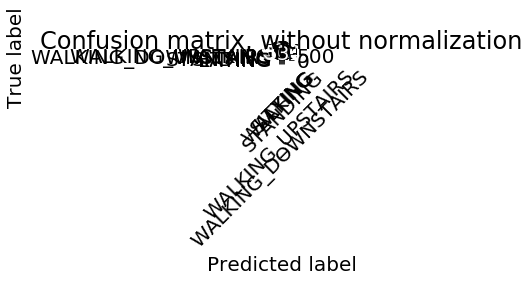

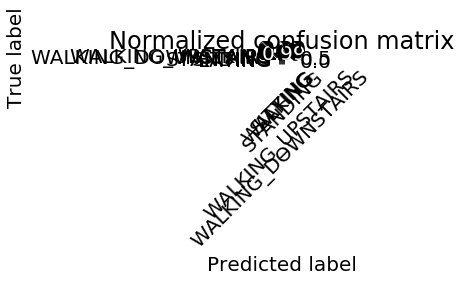

                    precision    recall  f1-score   support

           WALKING       0.83      0.99      0.90       496
  WALKING_UPSTAIRS       0.90      0.91      0.91       471
WALKING_DOWNSTAIRS       0.98      0.75      0.85       420
           SITTING       0.92      0.76      0.83       491
          STANDING       0.81      0.94      0.87       532
            LAYING       1.00      0.99      1.00       537

          accuracy                           0.90      2947
         macro avg       0.91      0.89      0.89      2947
      weighted avg       0.90      0.90      0.89      2947



In [49]:
show_conf_matrix(y_test, ypred, LABELS)
show_clf_report(y_test, ypred, LABELS)

In [50]:
x_train

array([[ 0.29, -0.02, -0.13, ..., -0.84,  0.18, -0.06],
       [ 0.28, -0.02, -0.12, ..., -0.84,  0.18, -0.05],
       [ 0.28, -0.02, -0.11, ..., -0.85,  0.18, -0.05],
       ...,
       [ 0.27, -0.02, -0.05, ..., -0.78,  0.25,  0.04],
       [ 0.29, -0.02, -0.16, ..., -0.79,  0.25,  0.03],
       [ 0.35, -0.01, -0.2 , ..., -0.78,  0.25,  0.04]])